In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('data.csv')
df.head()

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       99 non-null     float64
 1   y       99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [4]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [5]:
df.corr()

,x,y
x,1.000000,0.766264
y,0.766264,1.000000


In [6]:
x=df[['x']]
x.head()

,x
0,48.955889
1,44.687196
2,60.297327
3,45.618644
4,38.816818


In [7]:
y=df['y']
y.head()

0    60.723602
1    82.892504
2    97.379897
3    48.847153
4    56.877213
Name: y, dtype: float64

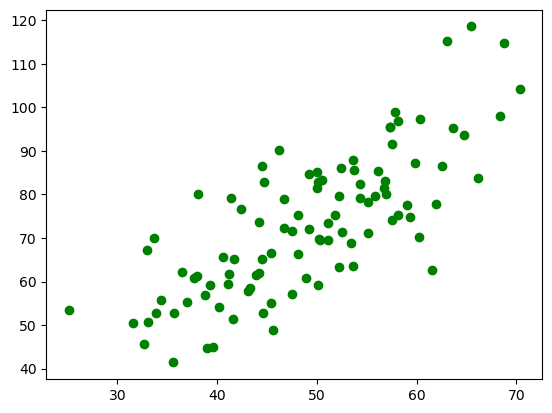

In [8]:
plt.scatter(df.x,df.y,marker='o',color='green')


In [9]:
xtrain,  xtest, ytrain, ytest = tts(x, y) 

In [10]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.20, random_state=1)
xtrain.head()

,x
2,60.297327
44,32.669044
59,41.182016
55,41.377727
19,66.189817


In [11]:
len(xtrain)

79

In [12]:
len(xtest)

20

Linear Regression using Gradient Descent

In [17]:
m = 0
c = 0
lr = 0.0001
n = len(x)

for i in range(500):
    yhat = (m * x['x']) + c
    Dm = (-2 / n) * sum(x['x'] * (y - yhat))
    Dc = (-2/n)*sum(y-yhat)
    
    #update the parameters
    m = m-(lr*Dm)
    c = c-(lr*Dc)
    
print(m,c)

1.4803580539891306 0.06532717814865903


In [18]:
m*48.955889 + c

72.53757174949655

xtrain এবং ytrain কি?

এগুলো হলো training ডেটা, অর্থাৎ মডেলকে শেখানোর জন্য যেসব ডেটা আমরা ব্যবহার করি।

xtrain = মডেলের ইনপুট (features)

ytrain = ইনপুটের সাথে সম্পর্কিত আউটপুট (target বা label)

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [21]:
m*48.955889 + c

72.53757174949655

In [22]:
reg.predict([[48.955889]])

array([72.7562248])

In [31]:
reg.score(xtrain,ytrain,)

0.5675246029088035

xtest এবং ytest কি?

এগুলো হলো testing ডেটা, অর্থাৎ মডেল শেখার পরে নতুন ডেটায় মডেলের পারফরম্যান্স যাচাই করার জন্য।

xtest = মডেলের ইনপুট (features) নতুন/অজানা ডেটা হিসেবে

ytest = ঐ ইনপুটের আসল আউটপুট (ground truth)

কেন দরকার?
মডেল শেখার সময় training ডেটা ব্যবহার করার কারণে মডেল ওই ডেটার উপর ওভারফিট হতে পারে। তাই পরীক্ষা করতে হবে নতুন ডেটায় কেমন কাজ করে। testing ডেটা দিয়ে মডেলের generalized পারফরম্যান্স পরিমাপ করা হয়।

কখন ব্যবহার হয়?
মডেল শেখার পরে (testing বা evaluation step), মডেলের predict এবং score করার সময়।

In [ ]:
#or if you want to score on test set:
reg.score(xtest, ytest)